In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt 

from sklearn.model_selection import StratifiedKFold
import catboost as cb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer 
from xgboost.sklearn import XGBRegressor 
from lightgbm.sklearn import LGBMRegressor 
# from catboost.sklearn Import CatBoostRegressor # commented out line 
# from eli5.sklearn Import PermutationImportance # commented out line 
# from mlxtend.sklearn Import StackingCVRegressor # commented out line 
import numpy as np

# Math Libraries 
import math

# Numpy alias np 


In [4]:
df = pd.read_csv(r'D:\Diamonds pred\train.csv', index_col=0)
test_df = pd.read_csv(r'D:\Diamonds pred\test.csv', index_col=0)
data = pd.concat([df, test_df])


In [5]:
df.shape

(43152, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
Id,,,,,,,,,,
1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43148,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43149,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43150,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02


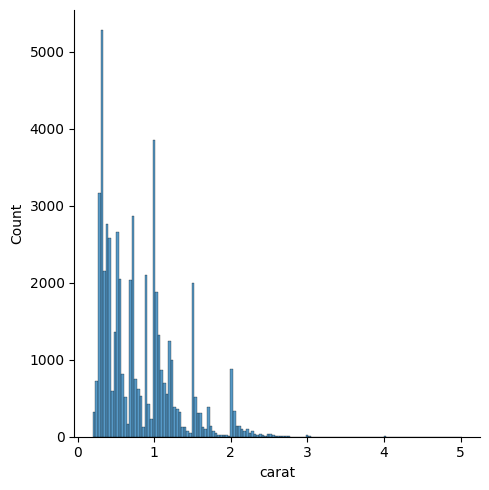

In [8]:
sns.displot(data['carat'])
plt.show()

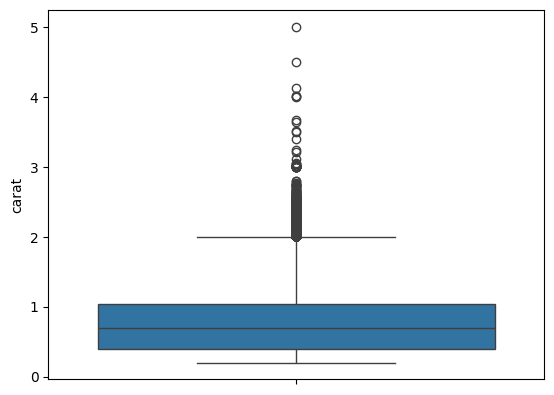

In [9]:
sns.boxplot(data['carat'])
plt.show()

In [10]:
q1=np.percentile(data['carat'].values,25)
q3=np.percentile(data['carat'].values,75)
iqr=q3-q1

print('Q1:',q1)
print('Q2:',q3)
condition=(data['carat'].values > q3 + 1.5*iqr) | (data['carat'].values < q1 - 1.5*iqr)
print("numbers of outliers:",np.sum(condition))


Q1: 0.4
Q2: 1.04
numbers of outliers: 1889


In [11]:
data['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

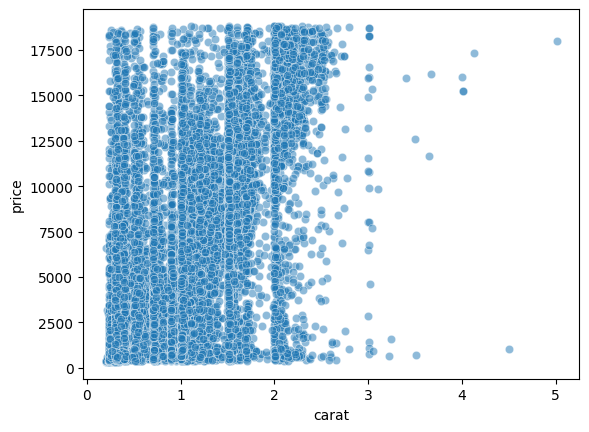

In [12]:
sns.scatterplot(x='carat', y='price', data=data, alpha=0.5)
plt.show()

In [13]:
q1=np.percentile(data['depth'].values,25)
q3=np.percentile(data['depth'].values,75)
iqr=q3-q1

print('Q1:',q1)
print('Q2:',q3)
condition=(data['depth'].values > q3 + 1.5*iqr) | (data['depth'].values < q1 - 1.5*iqr)
print("numbers of outliers:",np.sum(condition))


Q1: 61.0
Q2: 62.5
numbers of outliers: 2545


In [14]:
data['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

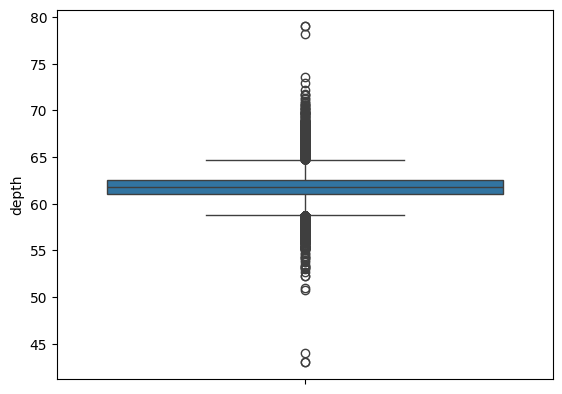

In [15]:
sns.boxplot(data['depth'])
plt.show()

In [18]:


#Dropping the outliers. 
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

In [19]:
# Get list of categorical variables
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


C:\Users\f1930\AppData\Local\Temp\ipykernel_15656\1998877422.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="cut",y="price", data=data,scale= "count")


Text(0.5, 0, 'Cut')

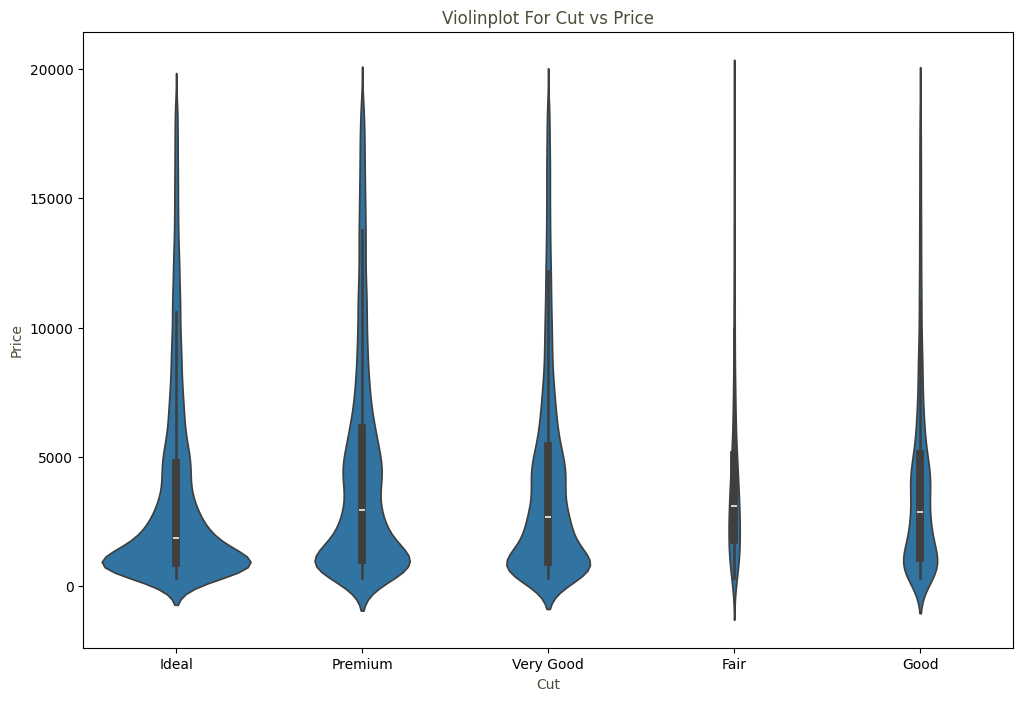

In [20]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=data,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

C:\Users\f1930\AppData\Local\Temp\ipykernel_15656\558226448.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="color",y="price", data=data,scale= "count")


Text(0.5, 0, 'Color')

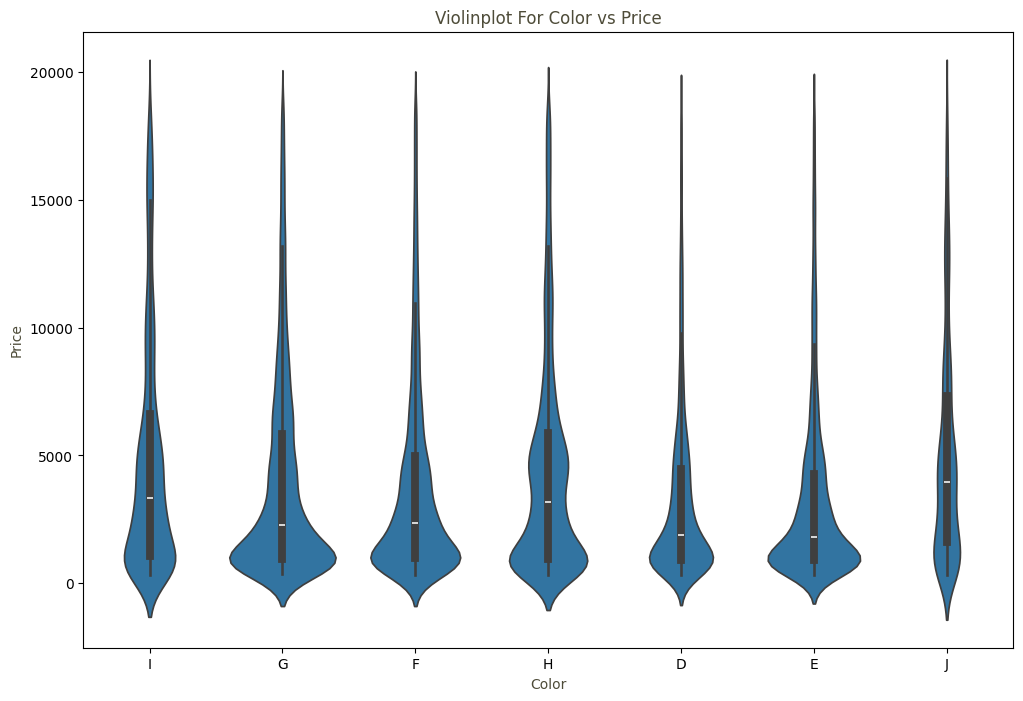

In [21]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

C:\Users\f1930\AppData\Local\Temp\ipykernel_15656\431327471.py:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="clarity",y="price", data=data,scale= "count")


Text(0.5, 0, 'Clarity')

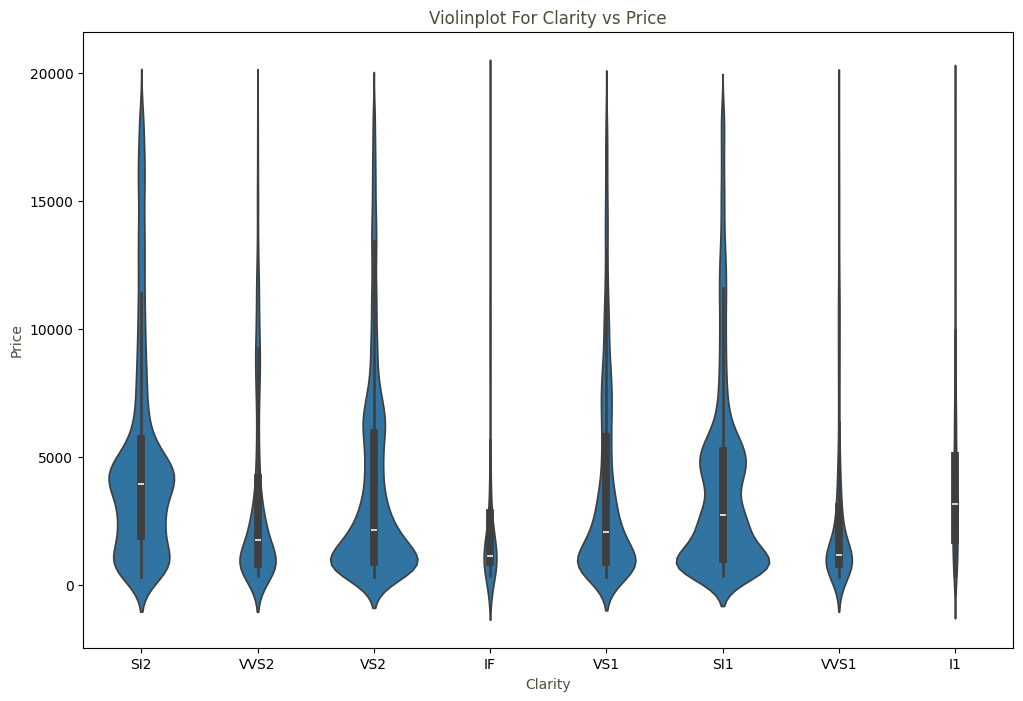

In [22]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=data,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

In [23]:
target='price'

color_map={'D':0, 'E':1, 'F':2, 'G':3, 'H':4, 'I':5, 'J':6}
df['color_map'] = df.color.map(color_map).astype('int32')
test_df['color_map'] = test_df.color.map(color_map).astype('int32')

clarity_map={'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
df['clarity_map'] = df.clarity.map(clarity_map).astype('int32')
test_df['clarity_map'] = test_df.clarity.map(clarity_map).astype('int32')

cut_map={'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df['cut_map'] = df.cut.map(cut_map).astype('int32')
test_df['cut_map'] = test_df.cut.map(cut_map).astype('int32')
df['shape'] = df.x/df.y
test_df['shape'] = test_df.x/test_df.y
#df['volume']=df.x*df.y*df.z
#test_df['volume']=test_df.x*test_df.y*test_df.z
df['mean_xy'] = (df['x'] + df['y']) / 2
# Calculate crown height
df['crown_height'] = (df['depth'] * df['mean_xy']) / 2

# Calculate crown angle
df['crown_angle'] = np.arctan((df['y'] / 2) / ((df['depth'] * df['mean_xy']) / 2)) * (180 / math.pi)

# Calculate pavilion depth
df['pavilion_depth'] = (df['depth'] * df['mean_xy']) / 2 - df['z']

# Calculate lower girdle half facet length
df['lower_girdle_half_facet_length'] = (df['mean_xy'] / 2) - (df['table'] / 2)

# Calculate girdle thickness
df['girdle_thickness'] = (df['depth'] * df['mean_xy']) / 2 - ((df['mean_xy'] / 2) - (df['table'] / 2))

# Calculate pavilion angle
df['pavilion_angle'] = np.arctan(df['z'] / (df['mean_xy'] / 2)) * (180 / math.pi)

#
test_df['mean_xy'] = (test_df['x'] + test_df['y']) / 2

# Calculate crown height
test_df['crown_height'] = (test_df['depth'] * test_df['mean_xy']) / 2

# Calculate crown angle
test_df['crown_angle'] = np.arctan((test_df['y'] / 2) / ((test_df['depth'] * test_df['mean_xy']) / 2)) * (180 / math.pi)

# Calculate pavilion depth
test_df['pavilion_depth'] = (test_df['depth'] * test_df['mean_xy']) / 2 - test_df['z']

# Calculate lower girdle half facet length
test_df['lower_girdle_half_facet_length'] = (test_df['mean_xy'] / 2) - (test_df['table'] / 2)

# Calculate girdle thickness
test_df['girdle_thickness'] = (test_df['depth'] * test_df['mean_xy']) / 2 - ((test_df['mean_xy'] / 2) - (test_df['table'] / 2))

# Calculate pavilion angle
test_df['pavilion_angle'] = np.arctan(test_df['z'] / (test_df['mean_xy'] / 2)) * (180 / math.pi)
#
# Count the total outliers for each variable
Q1 = df.drop(['clarity','cut','color'],axis=1).quantile(0.25)
Q3 = df.drop(['clarity','cut','color'],axis=1).quantile(0.75)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Marking the outliers in the DataFrame
outliers_mask = ((df[df.drop(['clarity','cut','color'],axis=1).columns] < min_value) | (df[df.drop(['clarity','cut','color'],axis=1).columns] > max_value))
# Removing outliers from the DataFrame
df = df[~outliers_mask.any(axis=1)]
# Counting the total number of outliers
total_outliers = outliers_mask.sum()
print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())

Total outliers for each variable:
carat                             1504
depth                             2056
table                              472
price                             2844
x                                   21
y                                   19
z                                   39
color_map                            0
clarity_map                          0
cut_map                              0
shape                              138
mean_xy                             21
crown_height                        24
crown_angle                       2141
pavilion_depth                      25
lower_girdle_half_facet_length     786
girdle_thickness                    24
pavilion_angle                    2265
dtype: int64
Total outliers: 12379


In [25]:
import scipy
skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,carat,0.683890,0.683890,True
1,depth,-0.195825,0.195825,False
2,table,0.361832,0.361832,False
3,price,1.196244,1.196244,True
4,x,0.247851,0.247851,False
5,y,0.241736,0.241736,False
6,z,0.244046,0.244046,False
7,color_map,0.216732,0.216732,False
8,clarity_map,0.535828,0.535828,True
9,cut_map,-0.649767,0.649767,True


In [26]:
for column in skew_df.query("Skewed == True")['Feature'].values:
    if column!='price':
         df[column] = np.log1p(df[column])
         test_df[column] = np.log1p(test_df[column])

C:\Users\f1930\AppData\Local\Temp\ipykernel_15656\4084582399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.log1p(df[column])


In [27]:
n_folds=6
features = ['carat','clarity','cut','depth','table','color_map','cut_map','clarity_map','shape','crown_height','crown_angle','pavilion_depth','lower_girdle_half_facet_length','girdle_thickness','pavilion_angle']
cat_features=['cut','clarity']
dataset = cb.Pool(df[features], df[target], cat_features=cat_features) 
params={
    'objective':'RMSE',
    'learning_rate': 0.05
}
cb_models = cb.cv(dataset, params=params, fold_count=n_folds, iterations=5000, early_stopping_rounds=50,
                 stratified=False, verbose_eval=100, return_models=True)

Training on fold [0/6]
0:	learn: 3943.0000064	test: 4000.6085500	best: 4000.6085500 (0)	total: 183ms	remaining: 15m 12s
100:	learn: 408.9808445	test: 423.9864824	best: 423.9864824 (100)	total: 3.63s	remaining: 2m 56s
200:	learn: 357.5372550	test: 371.9991298	best: 371.9991298 (200)	total: 7.26s	remaining: 2m 53s
300:	learn: 341.1762281	test: 359.9285205	best: 359.8950782 (299)	total: 10.7s	remaining: 2m 47s
400:	learn: 331.4881320	test: 355.3110956	best: 355.2987865 (399)	total: 14.4s	remaining: 2m 45s
500:	learn: 323.1136067	test: 352.0021074	best: 351.9456985 (496)	total: 17.7s	remaining: 2m 39s
600:	learn: 317.2243457	test: 350.4880927	best: 350.4608076 (597)	total: 21.1s	remaining: 2m 34s
700:	learn: 312.5648616	test: 349.3201725	best: 349.2783239 (696)	total: 24.2s	remaining: 2m 28s
800:	learn: 308.3630301	test: 348.7010181	best: 348.7010181 (800)	total: 27.2s	remaining: 2m 22s
900:	learn: 303.6052441	test: 348.2096407	best: 348.2091661 (898)	total: 30.3s	remaining: 2m 17s
1000:	l

In [28]:
cb_res = np.zeros(test_df.shape[0])
for cb_model in cb_models[1]:
    cb_res += cb_model.predict(test_df[features])/n_folds
    
test_df['id']=test_df.index
test_df['price']=cb_res
test_df[['id', 'price']].to_csv('submission.csv', index=False)